In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (25, 6)
%matplotlib inline

In [146]:
prob_data = pd.read_csv('data/baseline_need_evaluate.csv')

In [147]:
nbins = 100

In [148]:
numr = prob_data.groupby('prob').apply(lambda x: x[x['cover']==1]['eid'].unique().shape[0])

In [149]:
numr = numr.reset_index()

In [150]:
numr.columns=['prob','count']

In [151]:
numr.describe()

,prob,count
count,40052.000000,40052.000000
mean,0.470288,0.519000
std,0.019237,0.708113
min,0.330523,0.000000
25%,0.464876,0.000000
50%,0.465975,1.000000
75%,0.469091,1.000000
max,0.734236,58.000000


In [152]:
denr = prob_data.groupby('prob').apply(lambda x: x['eid'].unique().shape[0])

In [153]:
denr = denr.reset_index()

In [154]:
denr.columns=['prob','count']

In [155]:
denr.describe()

,prob,count
count,40052.000000,40052.000000
mean,0.470288,1.044118
std,0.019237,1.003590
min,0.330523,1.000000
25%,0.464876,1.000000
50%,0.465975,1.000000
75%,0.469091,1.000000
max,0.734236,113.000000


In [156]:
numr_bins, bins_n = np.histogram(numr['prob'],weights=numr['count'],bins = nbins)

In [157]:
denr_bins, bins_d = np.histogram(denr['prob'],weights=denr['count'], bins=nbins)

In [158]:
final_motherfucking_values = [float(numr_bins[i])/float(denr_bins[i]+1) for i in range(100)]

In [159]:
final_motherfucking_values

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2222222222222222,
 0.0,
 0.16666666666666666,
 0.0,
 0.3333333333333333,
 0.1,
 0.36363636363636365,
 0.2857142857142857,
 0.2,
 0.5384615384615384,
 0.35,
 0.3333333333333333,
 0.3333333333333333,
 0.5,
 0.3225806451612903,
 0.358974358974359,
 0.40625,
 0.375,
 0.27906976744186046,
 0.16666666666666666,
 0.15384615384615385,
 0.2727272727272727,
 0.26174496644295303,
 0.259927797833935,
 0.31719924812030076,
 0.48653127288142123,
 0.5430679478380234,
 0.5621468926553672,
 0.545045045045045,
 0.6109589041095891,
 0.6042105263157894,
 0.6306818181818182,
 0.6048109965635738,
 0.5662650602409639,
 0.5476190476190477,
 0.5865921787709497,
 0.504,
 0.6349206349206349,
 0.6875,
 0.6071428571428571,
 0.6301369863013698,
 0.6470588235294118,
 0.6129032258064516,
 0.46938775510204084,
 0.6415094339622641,
 0.49019607843137253,
 0.6511627906976745,
 0.5128205128205128,
 0.5757575757575758,
 0.5,
 0.5925925925925926,
 0.6296296296296297,
 0.708

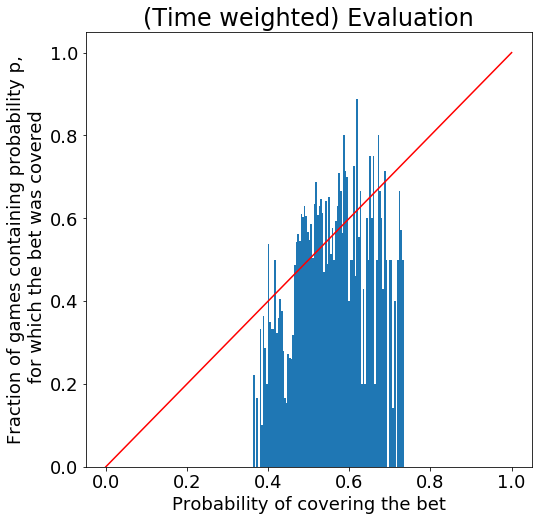

In [160]:
fig,ax = plt.subplots(figsize=(8,8))
ax.bar(bins_d[:-1],final_motherfucking_values, width=np.diff(bins_d),align='edge')
x = np.linspace(0,1)
ax.plot(x,x,color='red')

ax.set_title('(Time weighted) Evaluation', fontsize=24)
ax.set_xlabel('Probability of covering the bet', fontsize=18)
ax.set_ylabel("Fraction of games containing probability p,\n for which the bet was covered", fontsize=18)
ax.tick_params(labelsize=18)

plt.show()